In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
lineW = 3
lineBoxW=2

font = {'family' : 'normal',
        'weight' : 'normal',#'bold',
        'size'   : 24}

plt.rc('font', **font)
plt.rcParams['text.usetex'] = True

## Nonlinear Oscillator

$\ddot x + \omega^2 x +{x^3}=F(t)$ 

In [3]:
def f(u, t ,lam=0,A=0,W=1,gamma=0, w=1):
    x,  px = u      # unpack current values of u
    derivs = [px,-gamma*px -w**2*x - lam*x**3 +A*np.sin(W*t)]     # you write the derivative here
    return derivs
# Scipy Solver   
def NLosc_solution(t, x0,  px0, lam=1, A=0,W=1,gamma=0,w=1):
    u0 = [x0, px0]
    # Call the ODE solver
    solPend = odeint(f, u0, t, args=(lam,A,W,gamma,w))
    xP = solPend[:,0];        pxP = solPend[:,1];   
    return xP, pxP

In [4]:
Nt=1000
t = np.linspace(0,40*np.pi,Nt)
x0, v0 = 0.05, 0.06
A = 0.05

x,v  = NLosc_solution(t,x0,v0, A = A, W = 0.1) 

Text(0, 0.5, '$v$')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


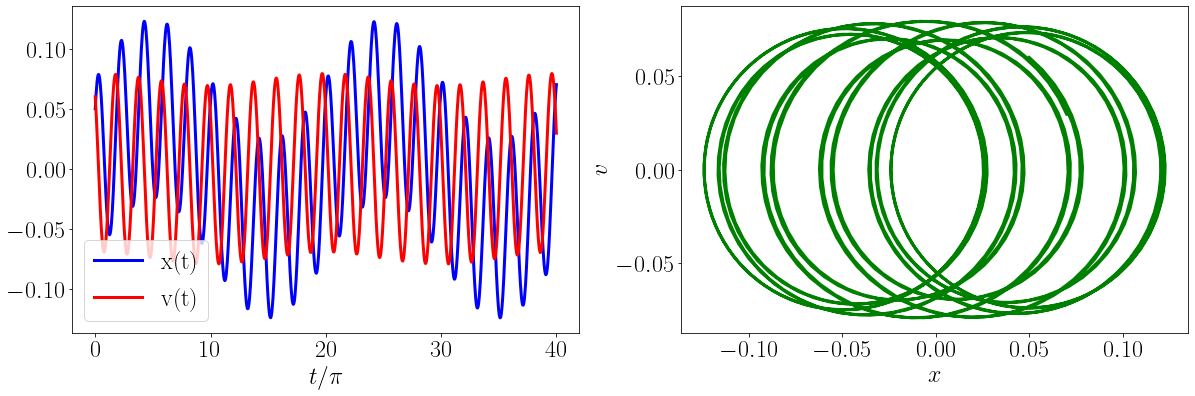

In [5]:
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
plt.plot(t/np.pi,x,'b',label='x(t)', linewidth = lineW)
plt.plot(t/np.pi,v,'r',label='v(t)', linewidth = lineW)
plt.xlabel('$t/\pi$')
plt.legend()
plt.subplot(1,2,2)
plt.plot(x,v,'g', linewidth = lineW)
plt.xlabel('$x$')
plt.ylabel('$v$')

## Pendulum

$\ddot x + \sin x =F(t)$ 

In [6]:
class Fpendulum:
    """forced pendulum"""
    
    def __init__(self, t, x0,  px0, lam=1, A=0, W=1, force = "sin"):
        self.t = t
        self.u0 = [x0, px0]
        # Call the ODE solver
        if force == "sin":
            spec_force =  Fpendulum.force
        elif force == "cos":
            spec_force =  Fpendulum.force3
        elif force == "sincos":
            spec_force =  Fpendulum.force2
        solPend = odeint(self.f, self.u0, t, args=(lam,A,W))
        self.xP = solPend[:,0];        
        self.pxP = solPend[:,1]; 
        self.force_pend_data = solPend
    
    @staticmethod
    def force(A, W, t):
        return A*np.sin(W*t)
    
    @staticmethod
    def force2(A, W, t):
        if isinstance(W, int) or isinstance(W, float):
            return A*np.sin(W*t)*np.cos(W*t)
        elif isinstance(W, list):
            W1, W2 = W
            return A*np.sin(W1*t)*np.cos(W2*t)
    
    @staticmethod
    def force3(A, W, t):
        return A*np.cos(W*t)
    
    @staticmethod
    def f(u, t, lam=0,A=0,W=1,gamma=0, w=1):
        
        x,  px = u        # unpack current values of u
        derivs = [px, -gamma * px - np.sin(x) + Fpendulum.force2(A, W, t)]     #     you write the derivative here
        return derivs
    
    def plot_(self):
        plt.figure(figsize=[20,6])
        plt.subplot(1,2,1)
        plt.plot(self.t/np.pi, self.xP,'b',label='x(t)', linewidth = lineW)
        plt.plot(self.t/np.pi, self.pxP,'r',label='v(t)', linewidth = lineW)
        plt.xlabel('$t/\pi$')
        plt.legend()
        plt.subplot(1,2,2)
        plt.plot(self.xP, self.pxP,'g', linewidth = lineW)
        plt.xlabel('$x$')
        plt.ylabel('$v$')

In [7]:
# can I go to 20k, 8k is 40pi, 0.005
8000/40
#200 pi pi.
#20/8 == x/40
40*(20/8)

100.0

In [8]:
(8000/40)*100

20000.0

In [22]:
#original was 8000, and 40 pi
#new is  20000 and 100 pi to preserve dt

Nt = 20000
t = np.linspace(0, 100*np.pi, Nt)
x0, px0 = .5, .5

my_fp = Fpendulum(t = t, x0 = x0, px0 = px0, A = .5, W = [.2, 0.5])
#sincos A = .5, W = [.2, 0.5]

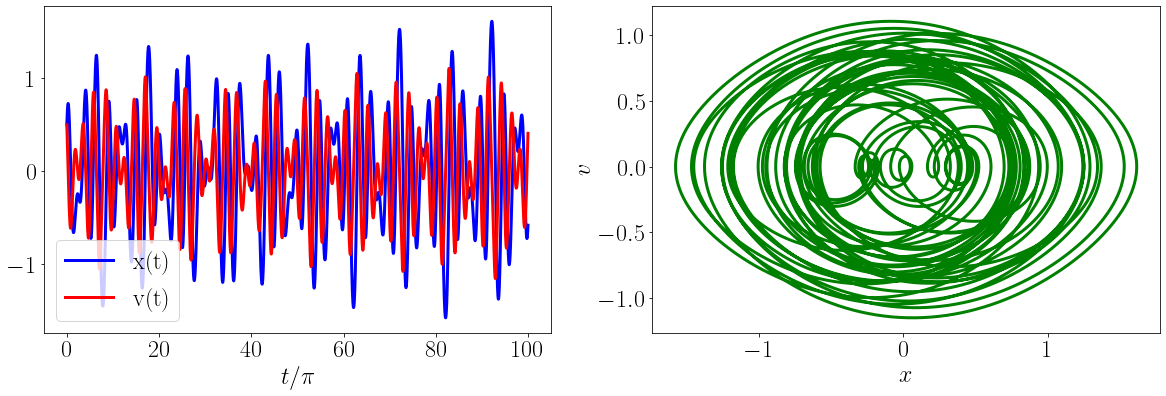

In [23]:
my_fp.plot_()

In [11]:
"{'cat' : tiger, 'dog' : wolf, 'monkey' : human}".replace(" ", "")

"{'cat':tiger,'dog':wolf,'monkey':human}"

In [12]:
#my_fp

In [13]:
# def force(A, W, t):
#     return A*np.sin(W*t)

# def f(u, t ,lam=0,A=0,W=1,gamma=0, w=1):
#     x,  px = u      # unpack current values of u
#     derivs = [px,-gamma*px-np.sin(x)+ force(A, W, t)]     #     you write the derivative here
#     return derivs
# # Scipy Solver   
# def pendulum_solution(t, x0,  px0, lam=1, A=0, W=1):
#     u0 = [x0, px0]
#     # Call the ODE solver
#     solPend = odeint(f, u0, t, args=(lam,A,W))
#     xP = solPend[:,0];        pxP = solPend[:,1];   
#     return xP, pxP

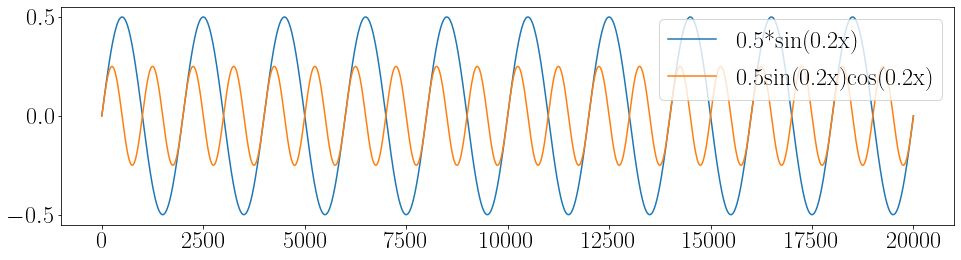

In [14]:
plt.figure(figsize = (16,4))
A = 0.5
W = 0.2
force_ = Fpendulum.force(A = A, W = W, t = t)
plt.plot(force_, label = f"{A}*sin({W}x)")
#W = 0.2
force_ = Fpendulum.force2(A = A, W = W, t = t)
if isinstance(W, list):
    plt.plot(force_, label = f"{A}sin({W[0]}x)cos({W[1]}x)")
else:
    plt.plot(force_, label = f"{A}sin({W}x)cos({W}x)")
plt.legend(); plt.show()

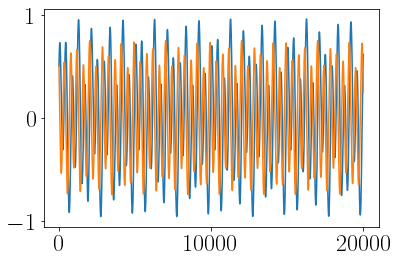

In [15]:
#plt.plot(force_)
plt.plot(my_fp.force_pend_data)

In [16]:
suffix = '_sin_cos'
with open('data/force_pendulum' + suffix + '.npy', 'wb') as f:
    np.save(f, my_fp.force_pend_data)

with open('data/force_pendulum_t' + suffix + '.npy', 'wb') as f:
    np.save(f, my_fp.t)

with open('data/force_pendulum_force' + suffix + '.npy', 'wb') as f:
    np.save(f, force_)

## Henon Heiles

In [17]:
# Use below in the Scipy Solver   
def f(u, t ,lam=1):
    x, y, px, py = u      # unpack current values of u
    derivs = [px, py, -x -2*lam*x*y, -y -lam*(x**2-y**2) ]     # list of dy/dt=f functions
    return derivs

# Scipy Solver   
def HHsolution(N,t, x0, y0, px0, py0,lam=1):
    u0 = [x0, y0, px0, py0]
    # Call the ODE solver
    solPend = odeint(f, u0, t, args=(lam,))
    xP = solPend[:,0];    yP  = solPend[:,1];
    pxP = solPend[:,2];   pyP = solPend[:,3]
    return xP,yP, pxP, pyP


In [18]:
Nt=2000
t = np.linspace(0,40*np.pi,Nt)

x0, y0, px0, py0, lam =  0.3, -0.3, 0.3, 0.15, 1; 

# x0, y0, px0, py0, lam =  0.5, -0.3, 0, 0, 1; 

# x0, y0, px0, py0, lam =  0.3, -0.3, 0.3, 0.15, 1; 


x0, y0, px0, py0, lam =  0.1, 0.1, -0.2, 0.2, 1; 
x, y, px, py = HHsolution(Nt,t, x0, y0, px0, py0, lam)


Text(0, 0.5, '$px$')

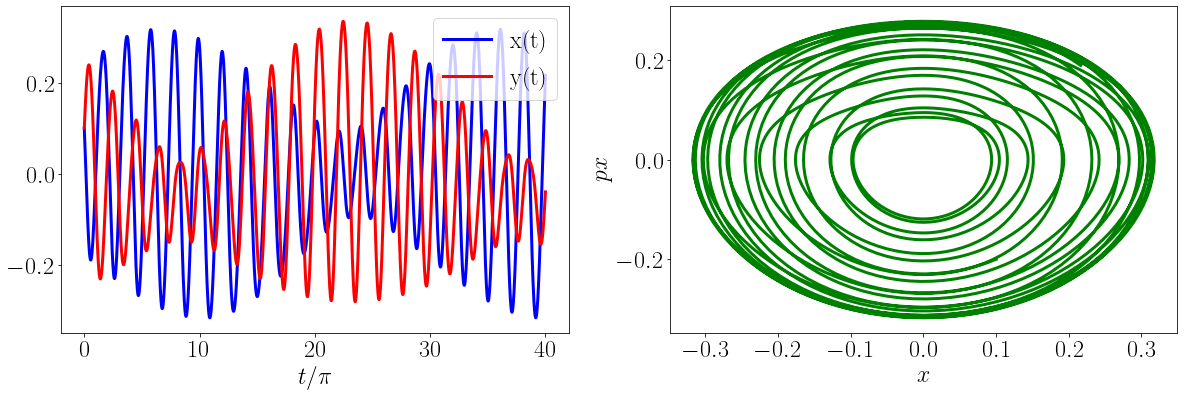

In [19]:
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
plt.plot(t/np.pi,x,'b',label='x(t)', linewidth = lineW)
plt.plot(t/np.pi,y,'r',label='y(t)', linewidth = lineW)
plt.xlabel('$t/\pi$')
plt.legend()
plt.subplot(1,2,2)
plt.plot(x,px,'g', linewidth = lineW)
plt.xlabel('$x$')
plt.ylabel('$px$')